In [2]:
import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np 

from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf 
import keras
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.applications import ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data = pd.read_csv('D:\\ML\\challenges-in-representation-learning-facial-expression-recognition-challenge\\icml_face_data.csv')

In [4]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
emotions = {0: 'Angry', 
            1: 'Disgust', 
            2: 'Fear', 
            3: 'Happy', 
            4: 'Sad', 
            5: 'Surprise', 
            6: 'Neutral'}

In [6]:
def prepare_data(data):
    
    images = np.zeros(shape=(len(data), 48, 48, 1))
    labels = np.array(list(map(int, data['emotion'])))
    
    for i, row  in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48, 1))
        images[i] = image 
        
    return images, labels

def plot_image_and_emotion(X, y, y_pred, num):
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    bar_label = emotions.values()
    
    axs[0].imshow(X[num], 'gray')
    axs[0].set_title(emotions[y[num]])
    
    axs[1].bar(bar_label, y_pred[num], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def res(X):
    
    for i in range(len(X)):
        image_string = (X)[i]
        image_data = np.asarray(image_string, dtype=np.float32).reshape(96, 96)
        a.append(image_data) 
        
    return a

In [7]:
X_train, y_train = prepare_data(data[data[' Usage']=='Training'])
X_val, y_val     = prepare_data(data[data[' Usage']=='PrivateTest'])
X_test, y_test   = prepare_data(data[data[' Usage']=='PublicTest'])

In [8]:
y_train1 = y_train
y_val1   = y_val
y_test1  = y_test
y_train  = to_categorical(y_train)
y_val    = to_categorical(y_val)
y_test   = to_categorical(y_test)

In [19]:
y_train.shape

(28709, 7)

In [9]:
X_train = X_train.astype('float32') / 255
X_val   = X_val.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

In [10]:
print('Размерность X_train:', X_train.shape)
print(X_train.shape[0], 'Размер train')
print(X_test.shape[0], 'Размер test')
print(X_val.shape[0], 'Размер val')

Размерность X_train: (28709, 48, 48, 1)
28709 Размер train
3589 Размер test
3589 Размер val


In [11]:
import cv2

img = X_train[0]
scale_percent = 200
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

In [12]:
X_train1 = []
X_test1 = []
X_val1 = []
for i in range(X_train.shape[0]):
    x = cv2.resize(X_train[i], dim, interpolation = cv2.INTER_AREA)
    X_train1.append(x)
    
for i in range(X_test.shape[0]):
    x = cv2.resize(X_test[i], dim, interpolation = cv2.INTER_AREA)
    X_test1.append(x)
    
for i in range(X_val.shape[0]):
    x = cv2.resize(X_val[i], dim, interpolation = cv2.INTER_AREA)
    X_val1.append(x)

In [14]:
X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
X_val1 = np.array(X_val1)

In [15]:
a = []
X_train_res = X_train1
res(X_train_res)
X_train_res = np.array(a)
X_train_res = np.repeat(X_train_res[..., np.newaxis], 3, -1)
print(X_train_res.shape)

a = []
X_test_res = X_test1
res(X_test_res)
X_test_res = np.array(a)
X_test_res = np.repeat(X_test_res[..., np.newaxis], 3, -1)
print(X_test_res.shape)

a = []
X_val_res = X_val1
res(X_val_res)
X_val_res = np.array(a)
X_val_res = np.repeat(X_val_res[..., np.newaxis], 3, -1)
print(X_val_res.shape)
            

(28709, 96, 96, 3)
(3589, 96, 96, 3)
(3589, 96, 96, 3)


In [16]:
y_train2  = to_categorical(y_train, 3)
y_val2    = to_categorical(y_val, 3)
y_test2   = to_categorical(y_test, 3)

In [17]:
datagen = ImageDataGenerator(rotation_range=10, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True) 

1. **ResNet50V2**

In [51]:
from keras.applications import ResNet50V2

In [52]:
resnet2 = Sequential()

resnet2.add(ResNet50V2(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
resnet2.add(Flatten())
resnet2.add(Dense(7, activation='softmax'))

resnet2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

resnet2.summary()

res_history2 = resnet2.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64,
                         validation_split = 0.25)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 flatten_9 (Flatten)         (None, 18432)             0         
                                                                 
 dense_9 (Dense)             (None, 7)                 129031    
                                                                 
Total params: 23,693,831
Trainable params: 23,648,391
Non-trainable params: 45,440
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 32s 64ms/step - loss: 1.8873 - accuracy: 0.3156 - val_loss: 5563.7983 - val_accuracy: 0.1819
Epoch 2/50
448/448 [==============================] - 28s 62ms/step - loss: 1.6993 - accuracy: 0.3278 - val_loss: 2.7851 - val_accuracy: 0.2990
Epoch 3/50

113/113 [==============================] - 2s 16ms/step


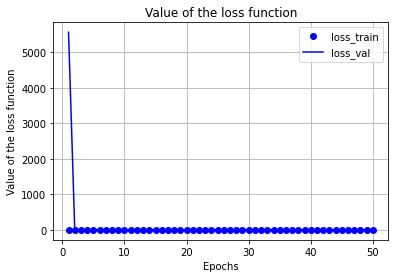

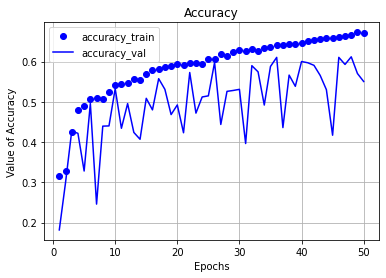

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


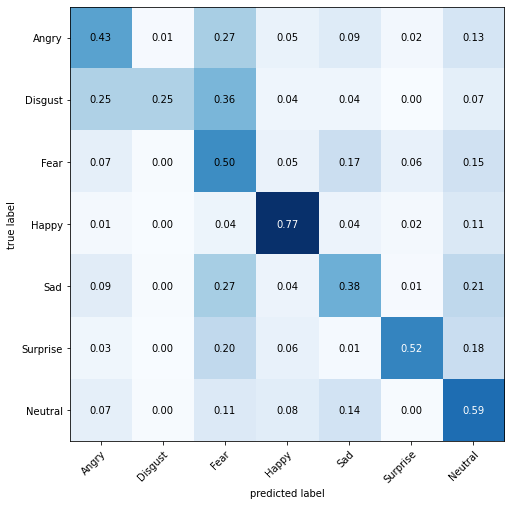

In [57]:
pred_test_labels = resnet2.predict(X_test_res)

loss = res_history2.history['loss']
loss_val = res_history2.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = res_history2.history['accuracy']
acc_val = res_history2.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

2. **EfficientNetB4**

In [29]:
from keras.applications import EfficientNetB4

In [30]:
enet = Sequential()
enet.add(EfficientNetB4(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
enet.add(Flatten())
enet.add(Dense(7, activation='softmax'))

enet.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

enet.summary()

enet_history = enet.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64,
                         validation_split = 0.25)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 3, 3, 1792)       17673823  
                                                                 
 flatten_2 (Flatten)         (None, 16128)             0         
                                                                 
 dense_2 (Dense)             (None, 7)                 112903    
                                                                 
Total params: 17,786,726
Trainable params: 17,661,519
Non-trainable params: 125,207
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 92s 175ms/step - loss: 1.7725 - accuracy: 0.3514 - val_loss: 2.1874 - val_accuracy: 0.1817
Epoch 2/50
448/448 [==============================] - 76s 169ms/step - loss: 1.6647 - accuracy: 0.3714 - val_loss: 1.9122 - val_accuracy: 0.1382
Epoch 3/50

113/113 [==============================] - 7s 42ms/step


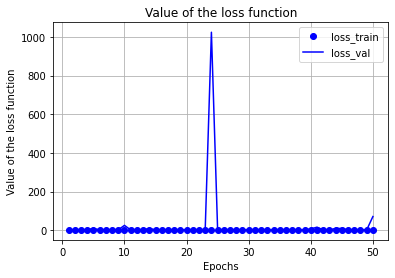

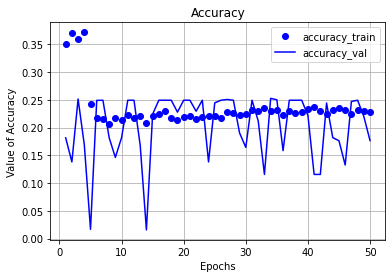

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


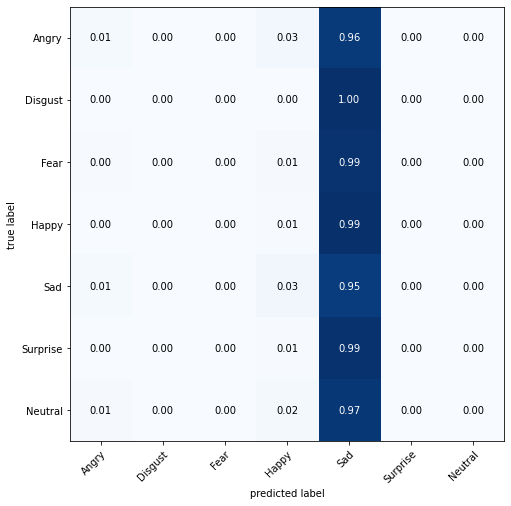

In [32]:
pred_test_labels = enet.predict(X_test_res)

loss = enet_history.history['loss']
loss_val = enet_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = enet_history.history['accuracy']
acc_val = enet_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

3. **EfficientNetV2M**

In [33]:
from keras.applications import EfficientNetV2M

In [34]:
enet2 = Sequential()
enet2.add(EfficientNetV2M(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
enet2.add(Flatten())
enet2.add(Dense(7, activation='softmax'))

enet2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

enet2.summary()

enet_history2 = enet2.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64,
                         validation_split = 0.25)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 3, 3, 1280)       53150388  
 l)                                                              
                                                                 
 flatten_3 (Flatten)         (None, 11520)             0         
                                                                 
 dense_3 (Dense)             (None, 7)                 80647     
                                                                 
Total params: 53,231,035
Trainable params: 52,939,003
Non-trainable params: 292,032
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 131s 244ms/step - loss: 1.8247 - accuracy: 0.2847 - val_loss: 1.8738 - val_accuracy: 0.2694
Epoch 2/50
448/448 [==============================] - 105s 235ms/step - loss: 1.5758 - a

113/113 [==============================] - 11s 67ms/step


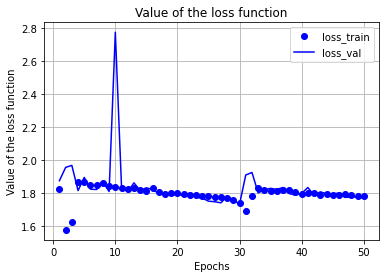

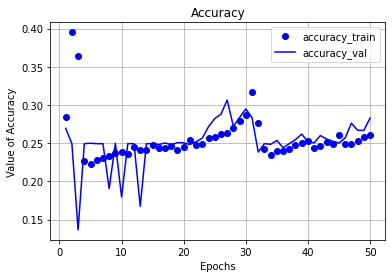

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


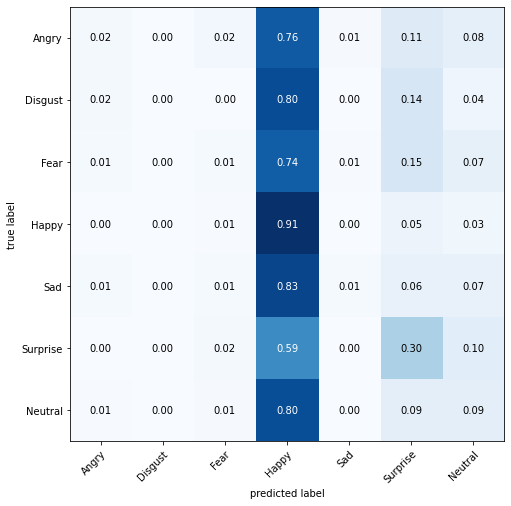

In [36]:
pred_test_labels = enet2.predict(X_test_res)

loss = enet_history2.history['loss']
loss_val = enet_history2.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = enet_history2.history['accuracy']
acc_val = enet_history2.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

4. **InceptionResNetV2**

In [37]:
from keras.applications import InceptionResNetV2

In [38]:
inc2 = Sequential()
inc2.add(InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
inc2.add(Flatten())
inc2.add(Dense(7, activation='softmax'))

inc2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

inc2.summary()

inc2_history = inc2.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 7)                 10759     
                                                                 
Total params: 54,347,495
Trainable params: 54,286,951
Non-trainable params: 60,544
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 136s 254ms/step - loss: 1.8662 - accuracy: 0.3975 - val_loss: 2264.4192 - val_accuracy: 0.4862
Epoch 2/50
448/448 [==============================] - 110s 245ms/step - loss: 1.6016 -

113/113 [==============================] - 8s 50ms/step


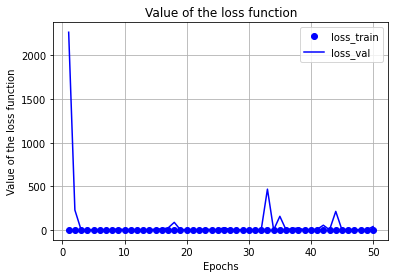

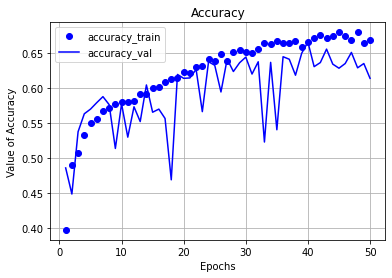

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


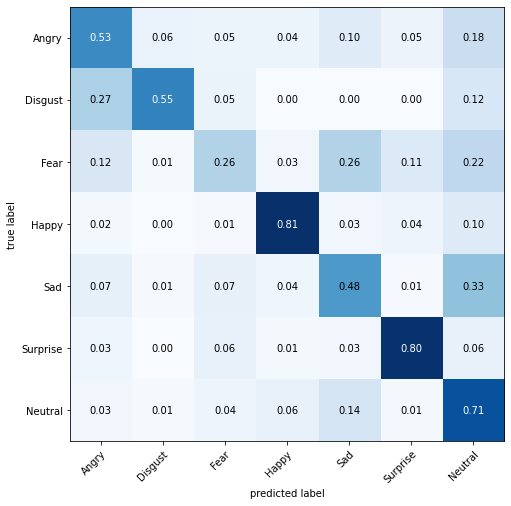

In [39]:
pred_test_labels = inc2.predict(X_test_res)

loss = inc2_history.history['loss']
loss_val = inc2_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = inc2_history.history['accuracy']
acc_val = inc2_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

5. **Xception**

In [40]:
from keras.applications import Xception

In [55]:
xcep = Sequential()
xcep.add(Xception(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
xcep.add(Flatten())
xcep.add(Dense(7, activation='softmax'))

xcep.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

xcep.summary()

xcep_history = xcep.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_10 (Flatten)        (None, 18432)             0         
                                                                 
 dense_10 (Dense)            (None, 7)                 129031    
                                                                 
Total params: 20,990,511
Trainable params: 20,935,983
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 55s 105ms/step - loss: 1.7135 - accuracy: 0.3347 - val_loss: 3.5513 - val_accuracy: 0.4152
Epoch 2/50
448/448 [==============================] - 47s 104ms/step - loss: 1.3965 - accuracy: 0.4690 - val_loss: 1.6595 - val_accuracy: 0.4698
Epoch 3/50

113/113 [==============================] - 3s 17ms/step


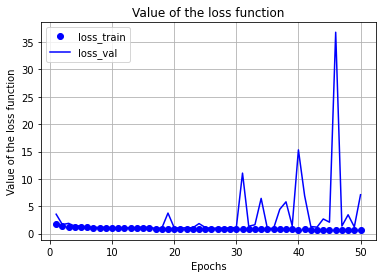

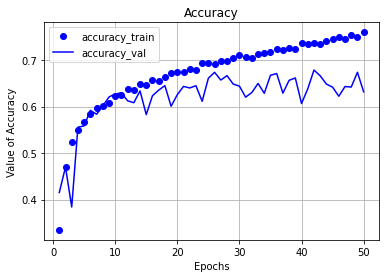

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


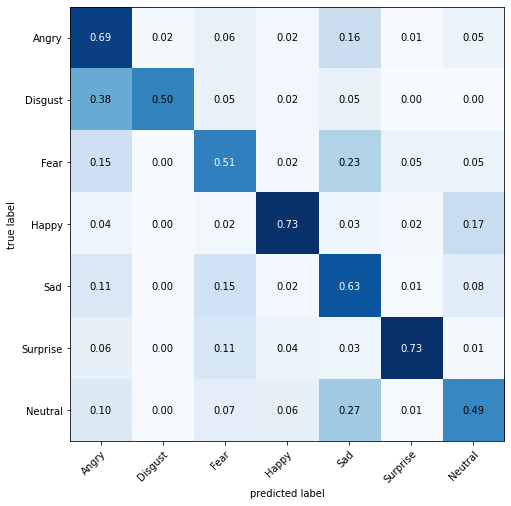

In [56]:
pred_test_labels = xcep.predict(X_test_res)

loss = xcep_history.history['loss']
loss_val = xcep_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = xcep_history.history['accuracy']
acc_val = xcep_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

6. **InceptionV3**

In [45]:
from keras.applications import InceptionV3

In [46]:
inc3 = Sequential()
inc3.add(InceptionV3(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
inc3.add(Flatten())
inc3.add(Dense(7, activation='softmax'))

inc3.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

inc3.summary()

inc3_history = inc3.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 21,817,127
Trainable params: 21,782,695
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 57s 105ms/step - loss: 1.9799 - accuracy: 0.2587 - val_loss: 14.3711 - val_accuracy: 0.2903
Epoch 2/50
448/448 [==============================] - 46s 102ms/step - loss: 1.9273 - accuracy: 0.2948 - val_loss: 19.6103 - val_accuracy: 0.2530
Epoch 3/5

113/113 [==============================] - 3s 20ms/step


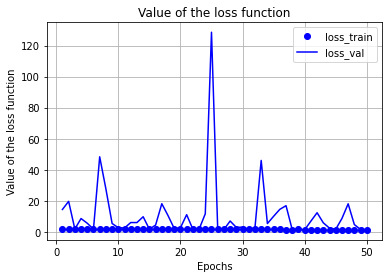

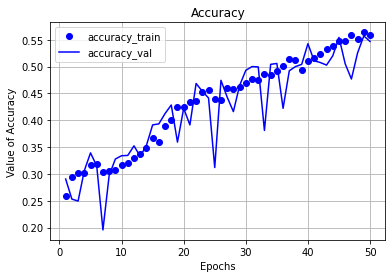

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


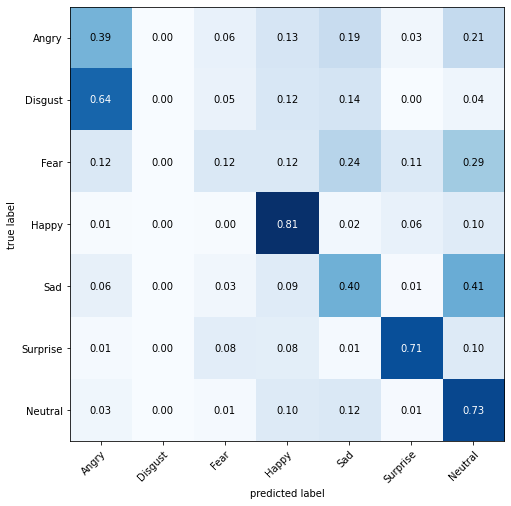

In [47]:
pred_test_labels = inc3.predict(X_test_res)

loss = inc3_history.history['loss']
loss_val = inc3_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = inc3_history.history['accuracy']
acc_val = inc3_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

7. **MobileNetV2**

In [48]:
from keras.applications import MobileNetV2

In [49]:
mob = Sequential()
mob.add(MobileNetV2(include_top=False, weights='imagenet', input_shape=(96, 96, 3)))
mob.add(Flatten())
mob.add(Dense(7, activation='softmax'))

mob.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

mob.summary()

mob_history = mob.fit(datagen.flow(X_train_res, y_train),
                         validation_data=(X_test_res, y_test),
                         epochs=50,
                         batch_size=64,
                         steps_per_epoch=len(X_train_res) // 64)

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 11520)             0         
                                                                 
 dense_8 (Dense)             (None, 7)                 80647     
                                                                 
Total params: 2,338,631
Trainable params: 2,304,519
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/50
448/448 [==============================] - 41s 77ms/step - loss: 2.2572 - accuracy: 0.3118 - val_loss: 8.6537 - val_accuracy: 0.1343
Epoch 2/50
448/448 [==========

113/113 [==============================] - 2s 11ms/step


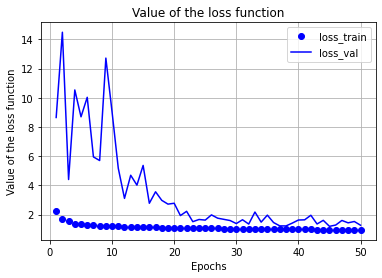

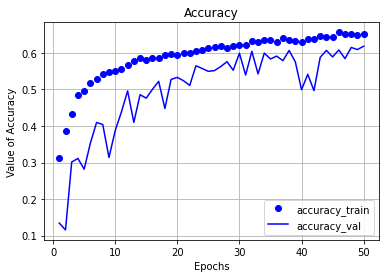

C:\Users\plato\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


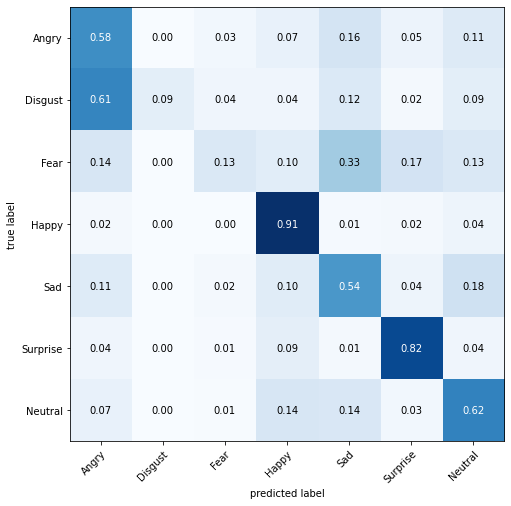

In [50]:
pred_test_labels = mob.predict(X_test_res)

loss = mob_history.history['loss']
loss_val = mob_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('Value of the loss function')
plt.xlabel('Epochs')
plt.ylabel('Value of the loss function')
plt.legend()
plt.grid()
plt.show()

acc = mob_history.history['accuracy']
acc_val = mob_history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

conf_mat = confusion_matrix(y_test.argmax(axis=1), pred_test_labels.argmax(axis=1))
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()